Saving Lending Club Loan.csv to Lending Club Loan (8).csv

✅ Dataset 'Lending Club Loan.csv' loaded successfully!

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7938, number of negative: 7938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4996
[LightGBM] [Info] Number of data points in the train set: 15876, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

📊 LightGBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1989
           1       0.62      0.45      0.53        11

    accuracy                           1.00      2000
   macro avg       0.81      0.73      0.76      

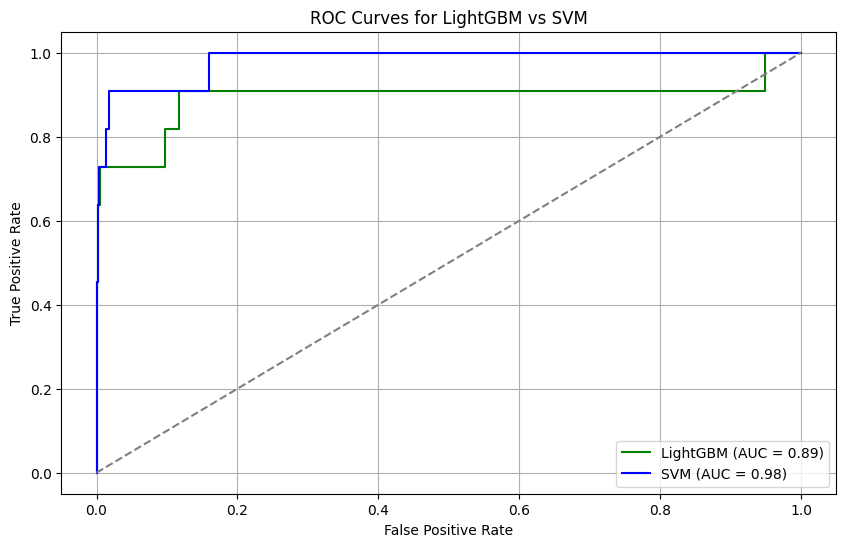

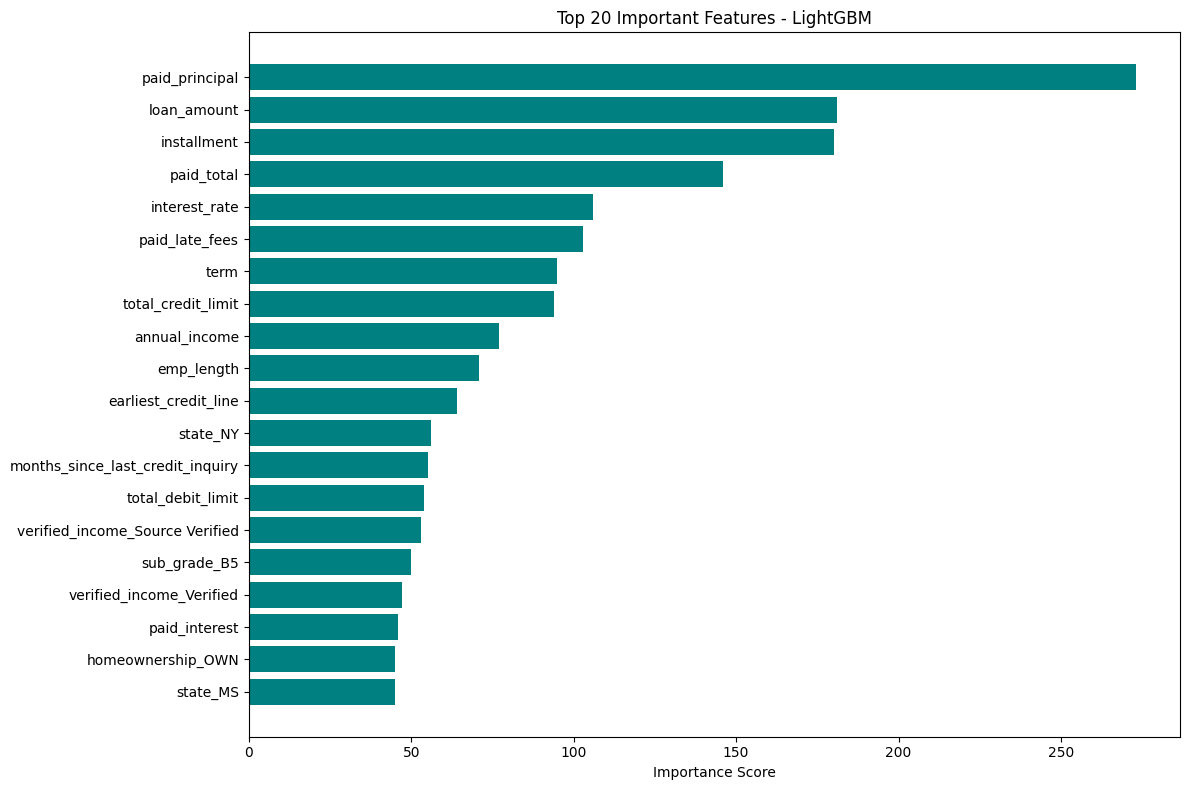


✅ Recommendations for Lenders:
1. Use LightGBM model for better scalability and accuracy on imbalanced financial data.
2. Prioritize applicants flagged as 'high risk' by the model for manual review.
3. Consider threshold tuning to reduce false negatives (risky applicants misclassified as safe).
4. Integrate credit behavior features like 'debt_to_income', 'public_record_bankrupt', etc., into approval strategy.


In [6]:
# Task 4: Loan Default Prediction

# Step 1: Import Libraries
# Importing essential libraries for data manipulation, visualization, model training, and evaluation.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from google.colab import files

# Step 2: Load and Inspect Data
# Load the dataset from a local file upload and display a confirmation message.
uploaded = files.upload()  # Upload file in Google Colab
file_name = 'Lending Club Loan.csv'  # Specify the dataset filename
df = pd.read_csv(file_name)  # Load the dataset into a pandas DataFrame
print(f"\n✅ Dataset '{file_name}' loaded successfully!\n")  # Confirmation message

# Step 3: Define Target Variable
# Create a binary target variable 'default' based on the 'loan_status' column.
# Assign 1 for default scenarios (e.g., 'Charged Off', 'Default', 'Late (31-120 days)') and 0 otherwise.
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)'] else 0)

# Step 4: Drop Irrelevant or High-Null Columns
# Drop columns with more than 40% missing values and irrelevant columns that do not contribute to prediction.
threshold = 0.4  # Set the threshold for missing values
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)  # Drop columns exceeding the threshold

# Drop specific columns that are irrelevant for the model
drop_cols = ['emp_title', 'issue_month', 'loan_status']
df.drop(columns=drop_cols, inplace=True)

# Step 5: Handle Remaining Missing Values
# Fill remaining missing values for numerical columns with their median values.
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 6: Encode Categorical Features
# Use one-hot encoding to convert categorical features into numerical format.
# Drop the first column in each category to avoid multicollinearity.
df = pd.get_dummies(df, drop_first=True)

# Step 7: Split Data into Features and Target
# Separate the dataset into feature variables (X) and the target variable (y).
# Split the data into training and testing sets with an 80-20 split.
X = df.drop('default', axis=1)  # Features
y = df['default']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Handle Class Imbalance with SMOTE
# Use Synthetic Minority Oversampling Technique (SMOTE) to balance the training data.
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Step 9: Train Models
# Train two machine learning models (LightGBM and Linear SVM) on the balanced training data.

# LightGBM Classifier
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_train_bal, y_train_bal)

# Linear Support Vector Machine (SVM) Classifier
model_svm = LinearSVC(max_iter=10000, random_state=42)
model_svm.fit(X_train_bal, y_train_bal)

# Step 10: Evaluate Models
# Evaluate the models using classification reports, confusion matrices, and ROC curves.

# Generate predictions for both models
y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Print classification reports and confusion matrices
print("\n📊 LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\n📊 SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n🧾 LightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("\n🧾 SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Step 11: ROC Curves
# Plot ROC curves to compare model performance visually.

# Calculate predicted probabilities and scores for ROC curves
y_prob_lgbm = model_lgbm.predict_proba(X_test)[:, 1]  # LightGBM probabilities
y_score_svm = model_svm.decision_function(X_test)  # SVM decision scores

# Compute ROC curve and AUC for each model
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='green', label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LightGBM vs SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 12: Feature Importance (LightGBM)
# Display the top 20 most important features identified by the LightGBM model.

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:20][::-1], feature_importance['Importance'][:20][::-1], color='teal')
plt.xlabel('Importance Score')
plt.title('Top 20 Important Features - LightGBM')
plt.tight_layout()
plt.show()

# Step 13: Recommendations
# Provide actionable recommendations based on model insights.
print("\n✅ Recommendations for Lenders:")
print("1. Use LightGBM model for better scalability and accuracy on imbalanced financial data.")
print("2. Prioritize applicants flagged as 'high risk' by the model for manual review.")
print("3. Consider threshold tuning to reduce false negatives (risky applicants misclassified as safe).")
print("4. Integrate credit behavior features like 'debt_to_income', 'public_record_bankrupt', etc., into approval strategy.")